# 03 – Feature Selection

 1. Import Libraries

In [1]:
import os, numpy as np, pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

2. Load Dataset

In [2]:
DATA_PATH = Path("C:/Users/youss/Desktop/Heart_Disease_Project/data/heart_disease.csv")
df = pd.read_csv(DATA_PATH)

# define target column
target = 'target' if 'target' in df.columns else df.columns[-1]
X = df.drop(columns=[target])
y = df[target]

# create results folder
os.makedirs("../results", exist_ok=True)

3. Feature Importance (Random Forest)


Top RF features:
 cp          0.137155
ca          0.123248
oldpeak     0.113889
thalach     0.113565
thal        0.100685
age         0.088233
chol        0.079017
trestbps    0.070076
exang       0.060361
slope       0.047040
sex         0.036816
restecg     0.020716
fbs         0.009200
dtype: float64


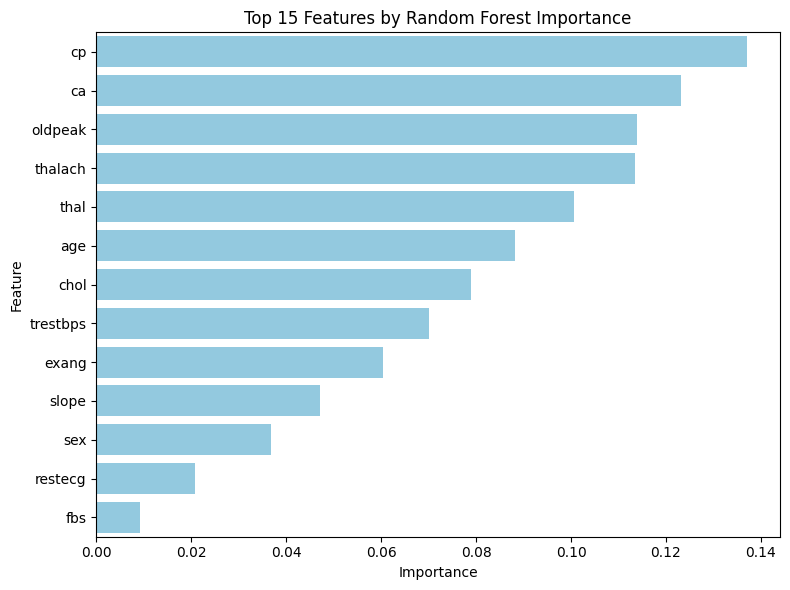

In [3]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(pd.get_dummies(X), y)

rf_importances = pd.Series(
    rf.feature_importances_, 
    index=pd.get_dummies(X).columns
).sort_values(ascending=False)

print("\nTop RF features:\n", rf_importances.head(15))
rf_importances.head(30).to_csv("../results/feature_importances_rf.csv")

# plot Top Features
plt.figure(figsize=(8, 6))
sns.barplot(
    x=rf_importances.head(15),
    y=rf_importances.head(15).index,
    color="skyblue"   #no warning
)
plt.title("Top 15 Features by Random Forest Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("../results/feature_importances_rf.png")
plt.show()

4. Recursive Feature Elimination (RFE)

In [4]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=min(10, X.shape[1]))
rfe.fit(pd.get_dummies(X), y)

rfe_support = pd.Series(rfe.support_, index=pd.get_dummies(X).columns)
rfe_selected = rfe_support[rfe_support].index.tolist()
print("\nRFE selected features:", rfe_selected)


RFE selected features: ['sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


5. Chi-Square Test


Top Chi-square features:
     feature        chi2             p
8     exang  130.470927  3.232318e-30
2        cp   72.607974  1.581388e-17
11       ca   52.656480  3.972979e-13
9   oldpeak   40.911849  1.592527e-10
1       sex   24.373650  7.934661e-07
10    slope   16.836974  4.073193e-05
7   thalach    9.471895  2.086437e-03
12     thal    6.457822  1.104650e-02
6   restecg    4.869671  2.733271e-02
0       age    3.630553  5.672798e-02


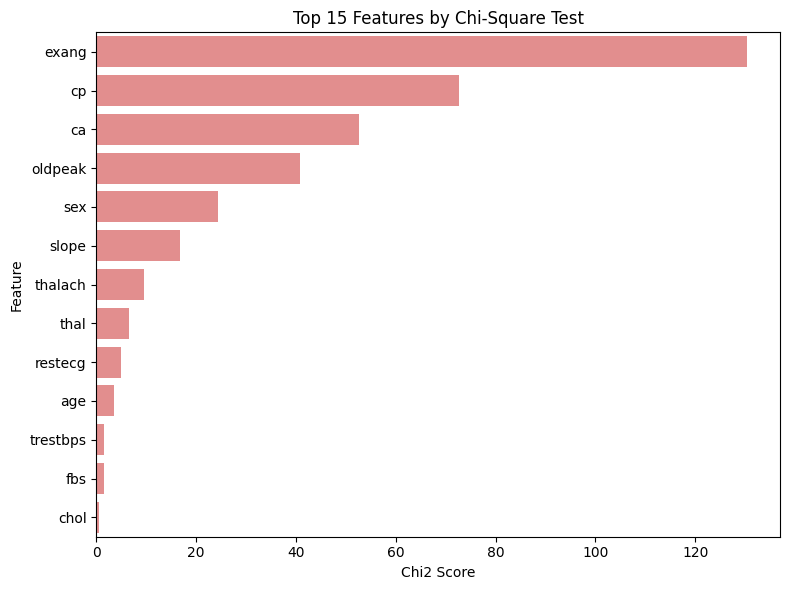


 Feature selection completed. Results saved in ../results/


In [5]:
X_mm = MinMaxScaler().fit_transform(pd.get_dummies(X))
chi_vals, p_vals = chi2(X_mm, y)

chi_df = pd.DataFrame({
    "feature": pd.get_dummies(X).columns,
    "chi2": chi_vals,
    "p": p_vals
}).sort_values("chi2", ascending=False)

chi_df.to_csv("../results/feature_chi2.csv", index=False)
print("\nTop Chi-square features:\n", chi_df.head(10))

# --- Plot Chi-square Scores ---
plt.figure(figsize=(8, 6))
sns.barplot(
    data=chi_df.head(15),
    x="chi2", 
    y="feature",
    color="lightcoral"
)
plt.title("Top 15 Features by Chi-Square Test")
plt.xlabel("Chi2 Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("../results/feature_chi2.png")
plt.show()

print("\n Feature selection completed. Results saved in ../results/")